In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
iris=pd.read_csv('/content/drive/MyDrive/Iris flower dataset/Iris.csv')

In [49]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [51]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [52]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [53]:
iris.drop(columns="Id",inplace=True)

In [54]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

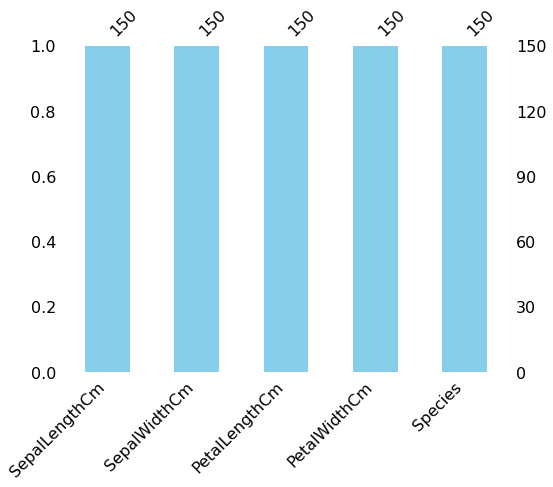

In [55]:
import missingno as msno
msno.bar(iris,figsize=(8,6),color='skyblue')
plt.show()

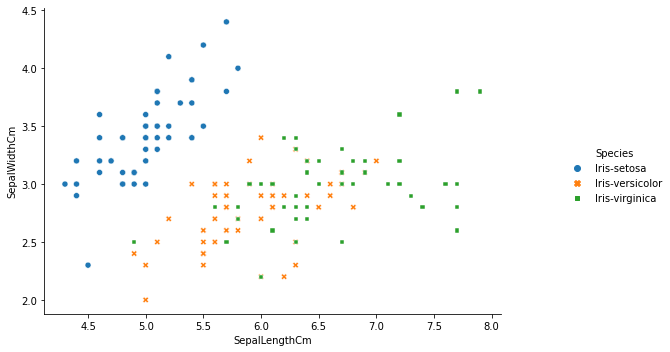

In [56]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

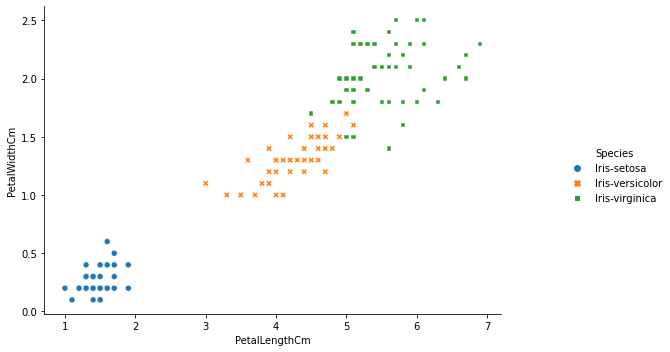

In [57]:
g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

In [58]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [59]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [61]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
precision =round(precision_score(y_test, Y_pred,average='micro')*100,2)
recall =  round(recall_score(y_test, Y_pred,average='micro')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='micro')*100,2)

print('Confusion matrix for Naive Bayes\n',cm)
print('Train_accuracy_Naive Bayes: %.2f' %acc_gaussian)
print('Test_accuracy_Naive Bayes: %.2f' %accuracy_nb)
print('precision_Naive Bayes: %.2f' %precision)
print('recall_Naive Bayes: %.2f' %recall)
print('f1-score_Naive Bayes : %.2f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Train_accuracy_Naive Bayes: 94.29
Test_accuracy_Naive Bayes: 100.00
precision_Naive Bayes: 100.00
recall_Naive Bayes: 100.00
f1-score_Naive Bayes : 100.00


In [62]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
precision =round(precision_score(y_test, Y_pred,average='micro')*100,2)
recall =  round(recall_score(y_test, Y_pred,average='micro')*100,2)
f1 = round(f1_score(y_test,Y_pred,average='micro')*100,2)
print('Confusion matrix for SVC\n',cm)
print('Train_accuracy_SVC: %.2f' %acc_linear_svc)
print('Test_accuracy_SVC: %.2f' %accuracy_svc)
print('precision_SVC: %.2f' %precision)
print('recall_SVC: %.2f' %recall)
print('f1-score_SVC : %.2f' %f1)

Confusion matrix for SVC
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
Train_accuracy_SVC: 98.10
Test_accuracy_SVC: 93.33
precision_SVC: 93.33
recall_SVC: 93.33
f1-score_SVC : 93.33
